In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
l = np.array([229, 175, 92, 50])
print(*np.round(l/np.sum(l), 2))

0.42 0.32 0.17 0.09


In [190]:
from scipy.io import loadmat
data = loadmat('indy_20160407_02_py.mat')

In [191]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'chan_names', 'cursor_pos', 'finger_pos', 'spikes', 't', 'target_pos', 'wf'])

In [192]:
data['spikes'].shape

(192, 3)

In [193]:
data['spikes']

array([[array([[ 60.09006019],
               [ 60.0968185 ],
               [ 60.12336024],
               ...,
               [887.39269359],
               [887.58335999],
               [887.72536652]]), array([], shape=(0, 0), dtype=uint8),
        array([], shape=(0, 0), dtype=uint8)],
       [array([[ 60.16042857],
               [ 60.20253487],
               [ 60.22629135],
               ...,
               [887.58413822],
               [887.62730952],
               [887.76149279]]), array([[ 60.06372324],
                                        [ 60.17832785],
                                        [ 60.29207227],
                                        ...,
                                        [887.61186779],
                                        [887.6568413 ],
                                        [887.73810492]]),
        array([], shape=(0, 0), dtype=uint8)],
       [array([[ 60.61262113],
               [ 61.11326878],
               [ 61.27563209],
         

In [194]:
#kick the unsorted spikes u1
sorted_spikes = data['spikes'][:,1:]
sorted_spikes.shape

(192, 2)

In [195]:
t = data['t'].reshape(data['t'].size)
dt = np.mean(t[1:]- t[:-1])
print(t[:10], dt, t[0], t[-1])

t_bin = 0.010 # 10 ms
k_min = int(t[0]/t_bin)
k_max = int(t[-1]/t_bin)

print(t[:10]/t_bin)
print(t[:10]/t_bin-k_min)
print(np.int32(np.round(t[:10]/t_bin-k_min)))
print(np.int32(t[:10]/t_bin-k_min))

[65.    65.004 65.008 65.012 65.016 65.02  65.024 65.028 65.032 65.036] 0.004 65.0 882.78
[6500.  6500.4 6500.8 6501.2 6501.6 6502.  6502.4 6502.8 6503.2 6503.6]
[0.  0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6]
[0 0 1 1 2 2 2 3 3 4]
[0 0 0 1 1 1 2 2 3 3]


In [196]:
firing_indices = []
n_channels, n_units = sorted_spikes.shape
for channel in range(n_channels):
    for unit in range(n_units):
        times = sorted_spikes[channel, unit]
        if len(times) > 0:
            ind = np.int32( np.round( times.reshape(times.size) / t_bin ))
            firing_indices.append(ind)

n_neurons = len(firing_indices)
print(n_neurons, 'recorded neurons')
print(firing_indices)

174 recorded neurons
[array([ 6006,  6018,  6029, ..., 88761, 88766, 88774]), array([ 6150,  6363,  6590,  6593,  6593,  6595,  6595,  6597,  6599,
        6601,  6644,  7528,  7603,  7703,  8022,  8093,  8644,  8741,
        8834,  8846,  9286,  9336,  9351,  9420,  9899, 10021, 10293,
       10586, 10623, 10856, 10896, 11772, 11796, 11849, 11864, 11980,
       11996, 12026, 12027, 12029, 12035, 12040, 12686, 12876, 12884,
       12885, 12889, 13016, 13022, 13025, 13163, 13210, 13295, 13436,
       13437, 13753, 13832, 14036, 14242, 14259, 14468, 14706, 14984,
       14993, 15144, 15251, 15256, 15257, 15272, 15339, 15400, 15984,
       16136, 16154, 16460, 16605, 17003, 17034, 17034, 17284, 17316,
       17416, 17479, 17492, 17547, 17646, 17650, 17778, 17785, 17841,
       17893, 17899, 17901, 18185, 18254, 18269, 18290, 18320, 18334,
       18342, 18647, 18844, 19099, 19131, 19205, 19217, 19298, 19671,
       19675, 20056, 20072, 20240, 20422, 20472, 20506, 20858, 21015,
       21159

In [197]:
a = min([x for x in [min(y) for y in firing_indices]])
b = max([x for x in [max(y) for y in firing_indices]])
n = b-a+1
spikes = np.zeros((n, n_neurons), dtype=np.int16)
for neuron in range(n_neurons):
    for indice in firing_indices[neuron]:
        spikes[indice-a, neuron]+=1
spikes[:10,:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int16)

(0.0, 82779.0, 0.0, 174.0)

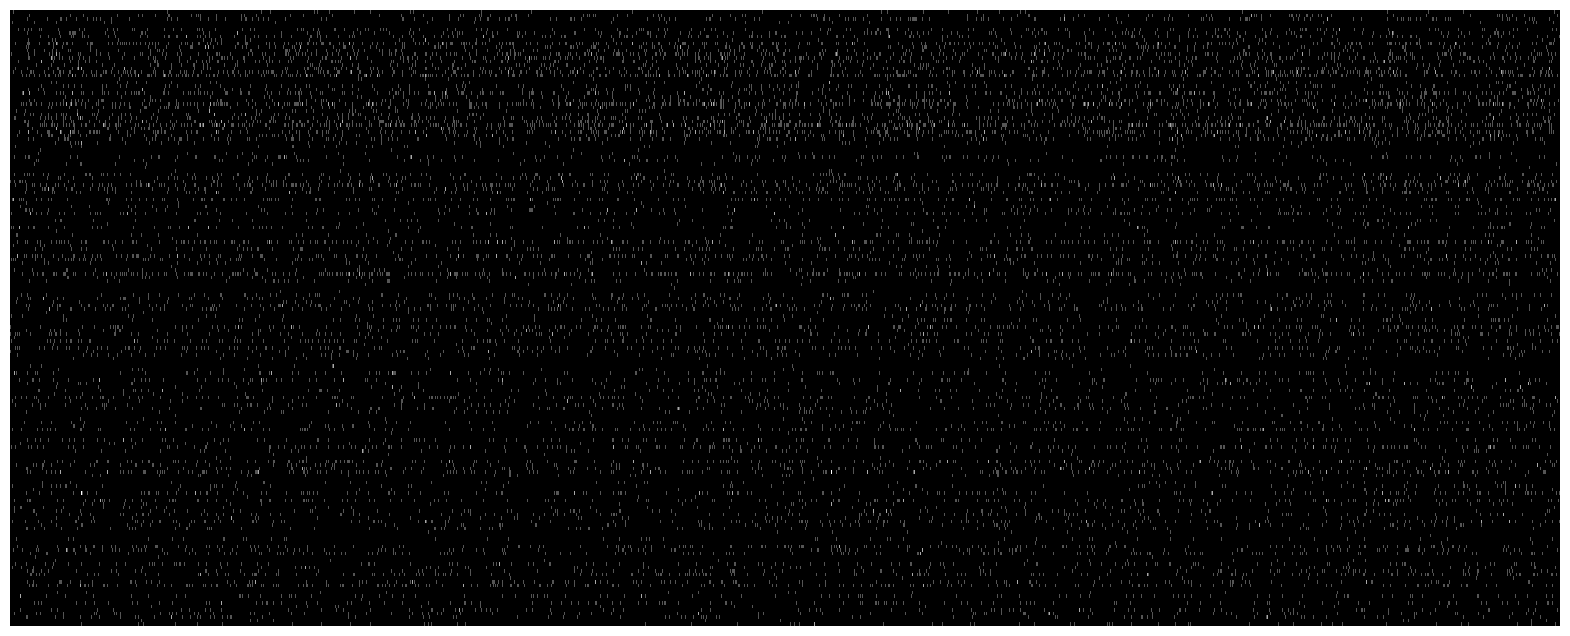

In [198]:
plt.figure(figsize=(20,8))
plt.pcolormesh(spikes.T)
plt.axis(False)

In [199]:
from scipy.ndimage import gaussian_filter1d

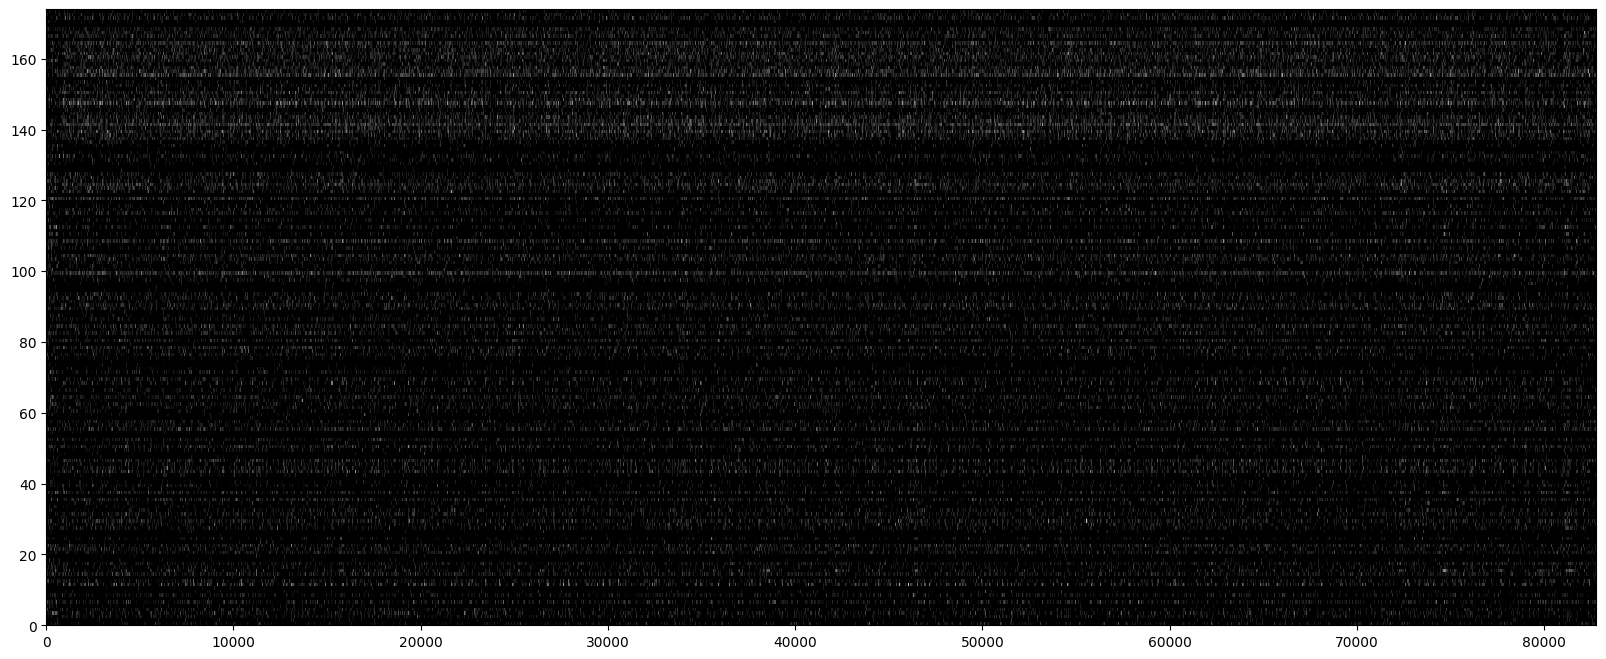

In [200]:
sigma = 20*1e-3/t_bin
f_spikes = gaussian_filter1d(spikes.astype(float), sigma, axis=0)
plt.figure(figsize=(20,8))
plt.pcolormesh(f_spikes.T)  

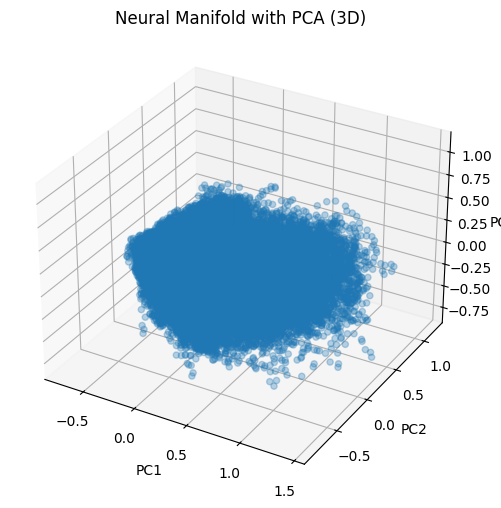

In [201]:
#neural manifold with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X = pca.fit_transform(f_spikes)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='o', alpha=0.3)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Neural Manifold with PCA (3D)')
plt.ion()
plt.show()

In [202]:
np.savetxt('manifold.csv', X, delimiter=',')

In [203]:
# Define the new bin size in milliseconds
new_bin_size_ms = 400

# Calculate the ratio between the new and old bin sizes
resample_factor = new_bin_size_ms // 10  # 400 ms / 10 ms = 40


# Resample the matrix by summing the spikes within each new bin
# Use np.add.reduceat to sum spikes within each group of 'resample_factor' bins
# Then reshape the result to match the new number of bins
rf_spikes = np.add.reduceat(f_spikes, np.arange(0, f_spikes.shape[0], resample_factor), axis=0)

# Verify the shape of the resampled matrix
print("Original shape:", f_spikes.shape)
print("Resampled shape:", rf_spikes.shape)

Original shape: (82779, 174)
Resampled shape: (2070, 174)


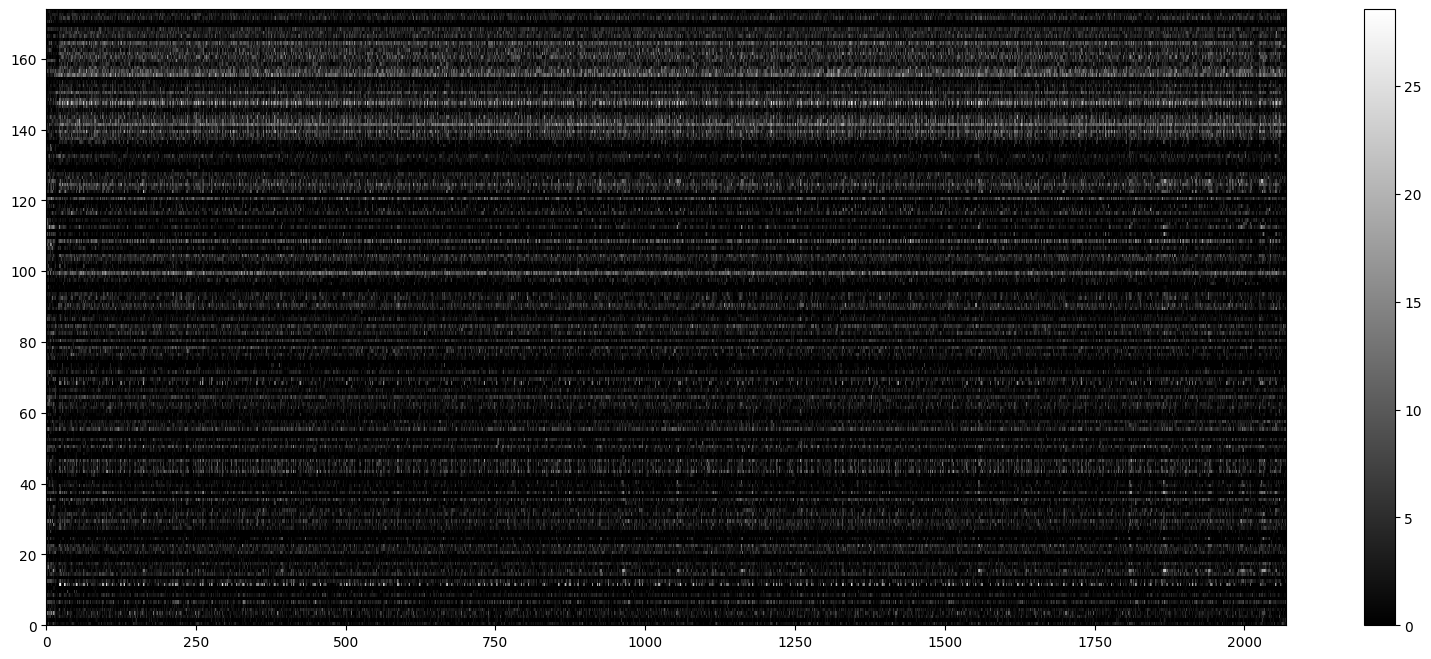

In [204]:
plt.figure(figsize=(20,8))
plt.pcolormesh(rf_spikes.T)
plt.colorbar()

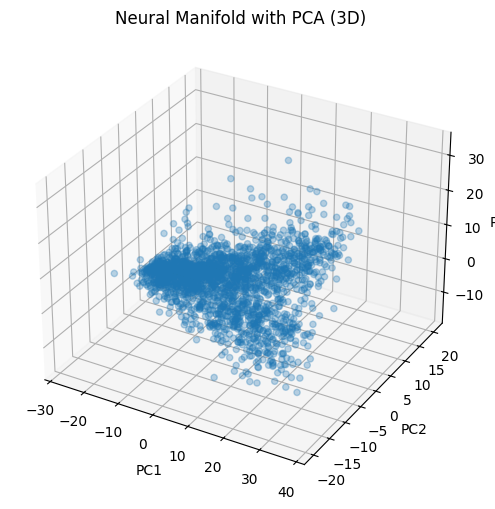

In [205]:
pca = PCA(n_components=3)
X = pca.fit_transform(rf_spikes)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='o', alpha=0.3)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Neural Manifold with PCA (3D)')
plt.ion()
plt.show()

In [206]:
pca.explained_variance_ratio_

array([0.21561016, 0.07705652, 0.03768905])

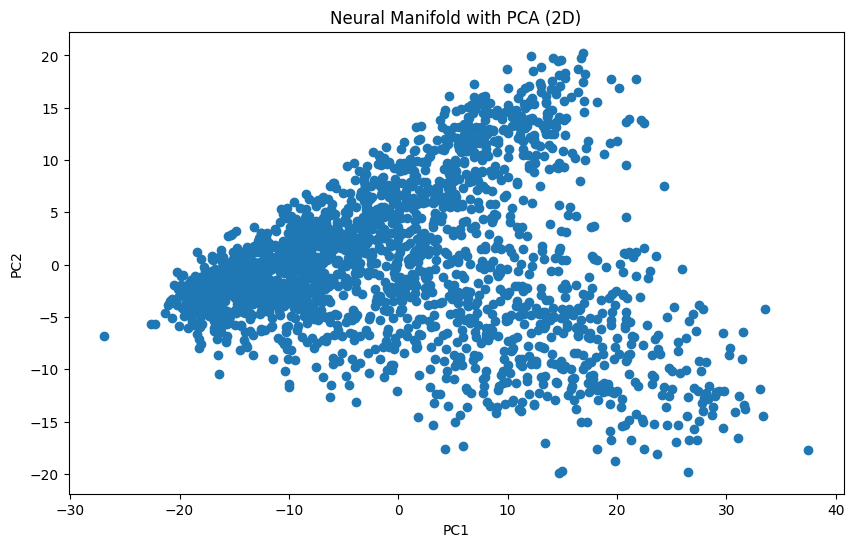

In [207]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Neural Manifold with PCA (2D)')
plt.show()

In [208]:
np.savetxt('manifold.csv', X, delimiter=',')

In [209]:
from useful_functions import create_autoencoder

In [210]:
input_size = 174

# Generate random data for demonstration
input_data = rf_spikes/np.max(rf_spikes)

# Create an autoencoder model
autoencoder, encoder = create_autoencoder(data=input_data, input_size=input_size, latent_dim=3, dimensions=[64, 32])

# predict the autoencoder output from test data
decoded_data = autoencoder.predict(input_data)
print(decoded_data.shape)

# Viusalize the latent space
X = encoder.predict(input_data)
print(X.shape)

TypeError: create_autoencoder() got an unexpected keyword argument 'dimensions'

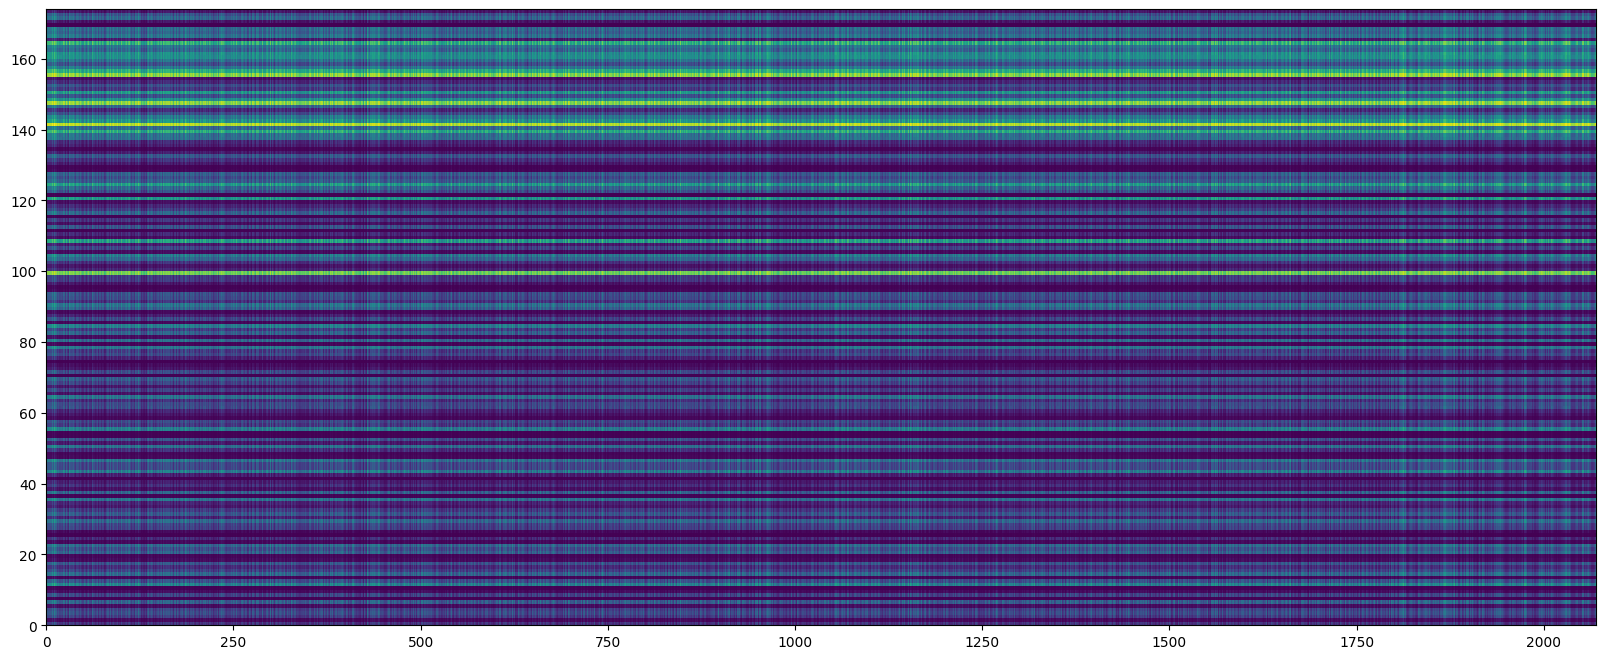

In [ ]:
plt.figure(figsize=(20, 8))
plt.pcolormesh(decoded_data.T)

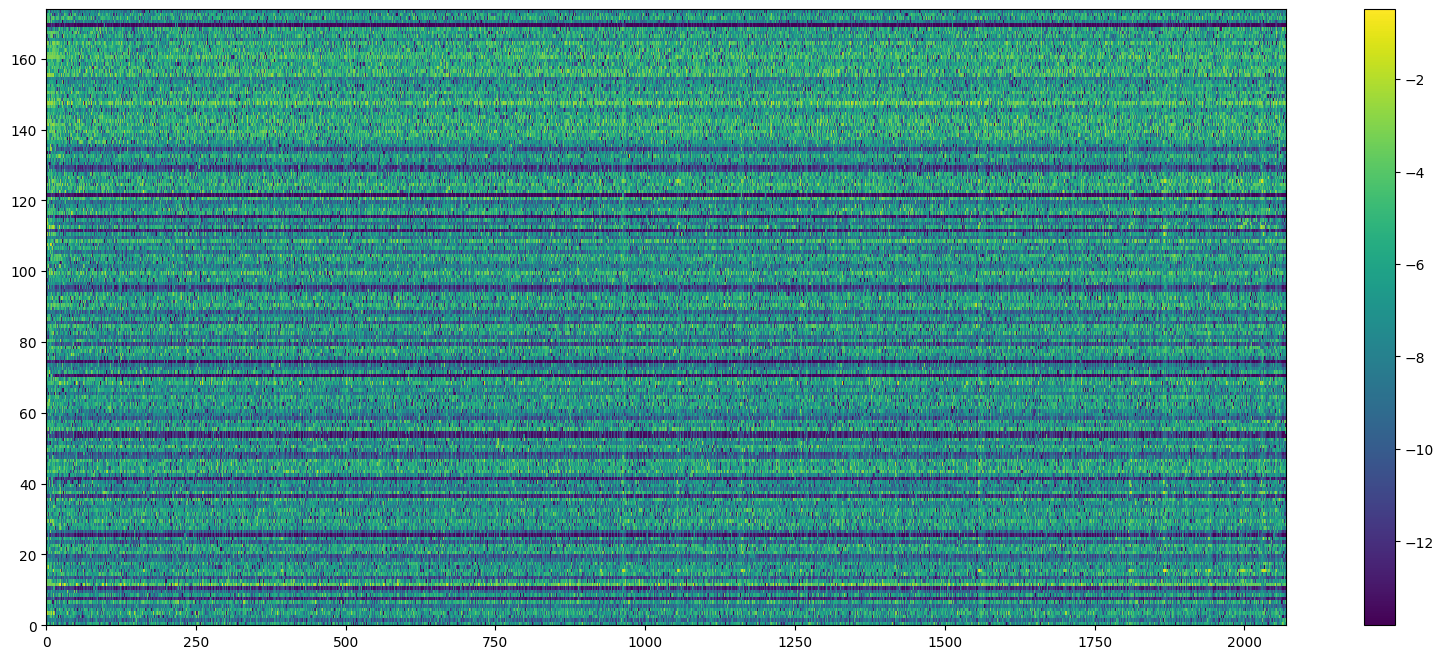

In [ ]:
plt.figure(figsize=(20, 8))
plt.pcolormesh(np.log((decoded_data.T- input_data.T)**2+ 1e-6))
plt.colorbar()

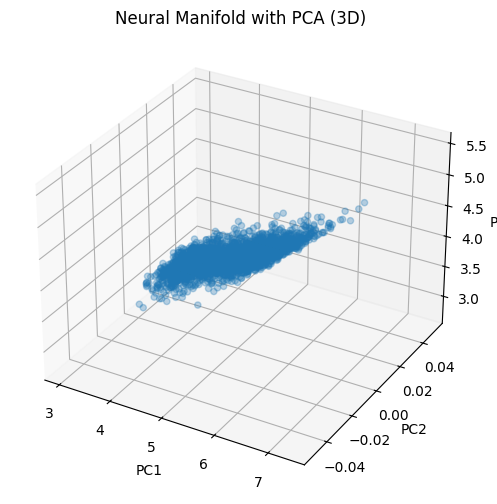

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='o', alpha=0.3)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Neural Manifold with PCA (3D)')
plt.ion()
plt.show()

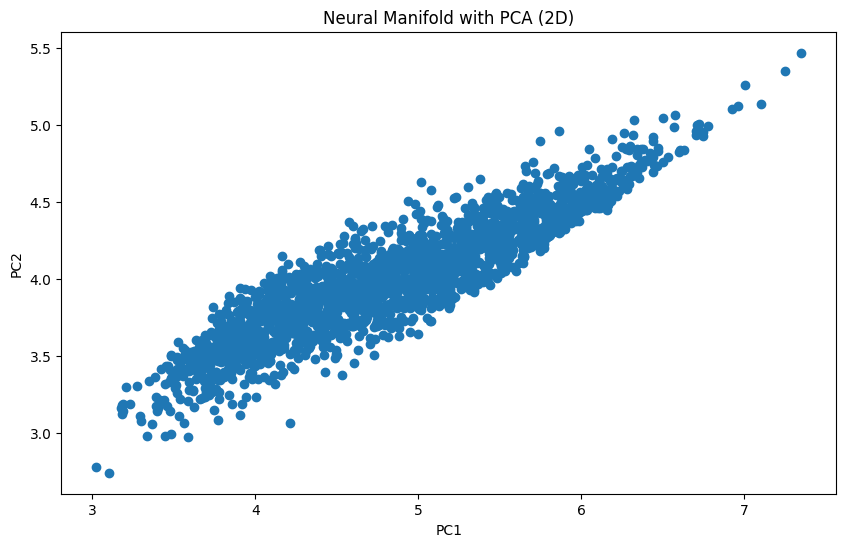

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 2])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Neural Manifold with PCA (2D)')
plt.show()

In [ ]:
np.savetxt('manifold.csv', X, delimiter=',')